In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
from ggplot import ggplot
import folium

# Load the dataset
df = pd.read_csv('/kaggle/input/cinepulse-2023/moviesdataset_2023.csv')


In [2]:
df.head()

,Unnamed: 0,name,rating,votes,runtime,genre,description
0,0,Oppenheimer,8.4,"565,499",180 min,"['Biography, Drama, History']",['The story of American scientist J. Robert Op...
1,1,Sound of Freedom,7.7,"91,802",131 min,"['Biography, Crime, Drama']",['The incredible true story of a former govern...
2,2,Saltburn,7.3,"38,572",131 min,"['Comedy, Drama, Thriller']","[""A student at Oxford University finds himself..."
3,3,Tetris,7.4,"75,645",118 min,"['Biography, Drama, History']","[""The story of how one of the world's most pop..."
4,4,Jesus Revolution,7.1,"12,613",120 min,['Drama'],['The true story of a national spiritual awake...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   100 non-null    int64 
 1   name         100 non-null    object
 2   rating       98 non-null     object
 3   votes        98 non-null     object
 4   runtime      98 non-null     object
 5   genre        100 non-null    object
 6   description  100 non-null    object
dtypes: int64(1), object(6)
memory usage: 5.6+ KB


In [4]:
df.describe()

,Unnamed: 0
count,100.000000
mean,49.500000
std,29.011492
min,0.000000
25%,24.750000
50%,49.500000
75%,74.250000
max,99.000000


In [5]:
# Check for missing values in the dataset
df.isnull().sum()

# Handle missing values (if any)
# Convert 'runtime' column to numeric values
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Fill missing values in the 'runtime' column with the mean
df['runtime'].fillna(df['runtime'].mean(), inplace=True)

# Check again for missing values after handling
df.isnull().sum()


Unnamed: 0       0
name             0
rating           2
votes            2
runtime        100
genre            0
description      0
dtype: int64

**What does the distribution of movie ratings look like?**

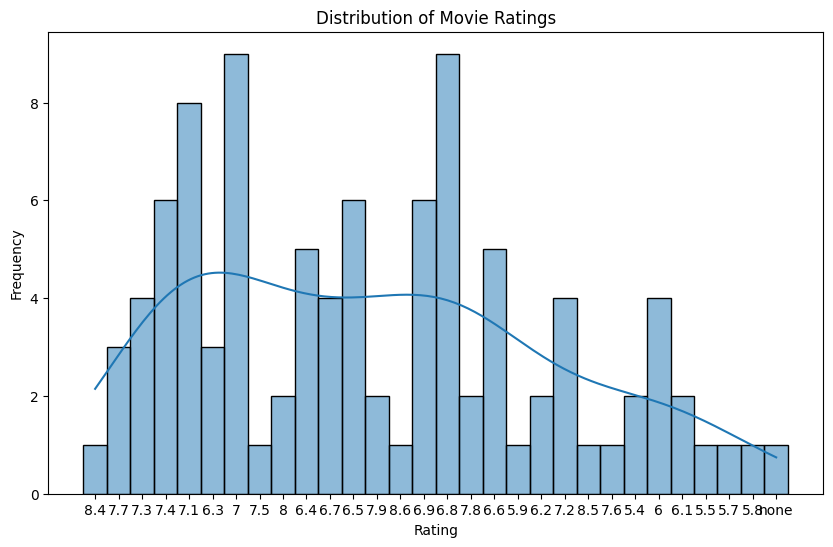

In [6]:
# Plot a histogram of movie ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


**How are the ratings correlated with the number of votes?**

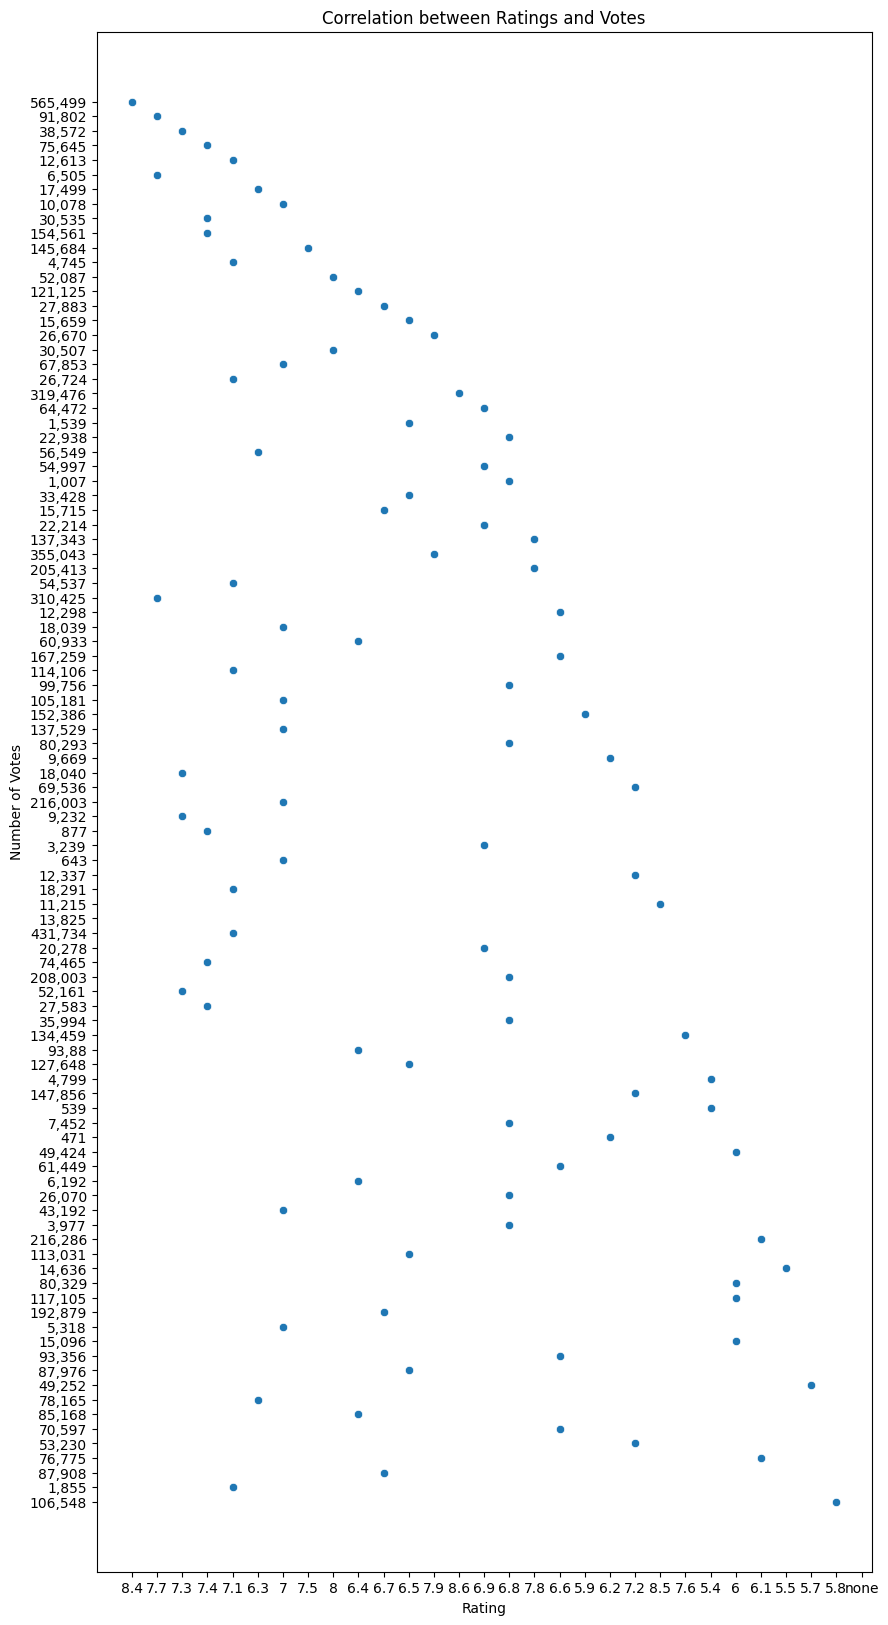

In [7]:
# Scatter plot of ratings vs. votes
plt.figure(figsize=(10, 20))
sns.scatterplot(x='rating', y='votes', data=df)
plt.title('Correlation between Ratings and Votes')
plt.xlabel('Rating')
plt.ylabel('Number of Votes')
plt.show()


**What are the most common genres in the dataset?**

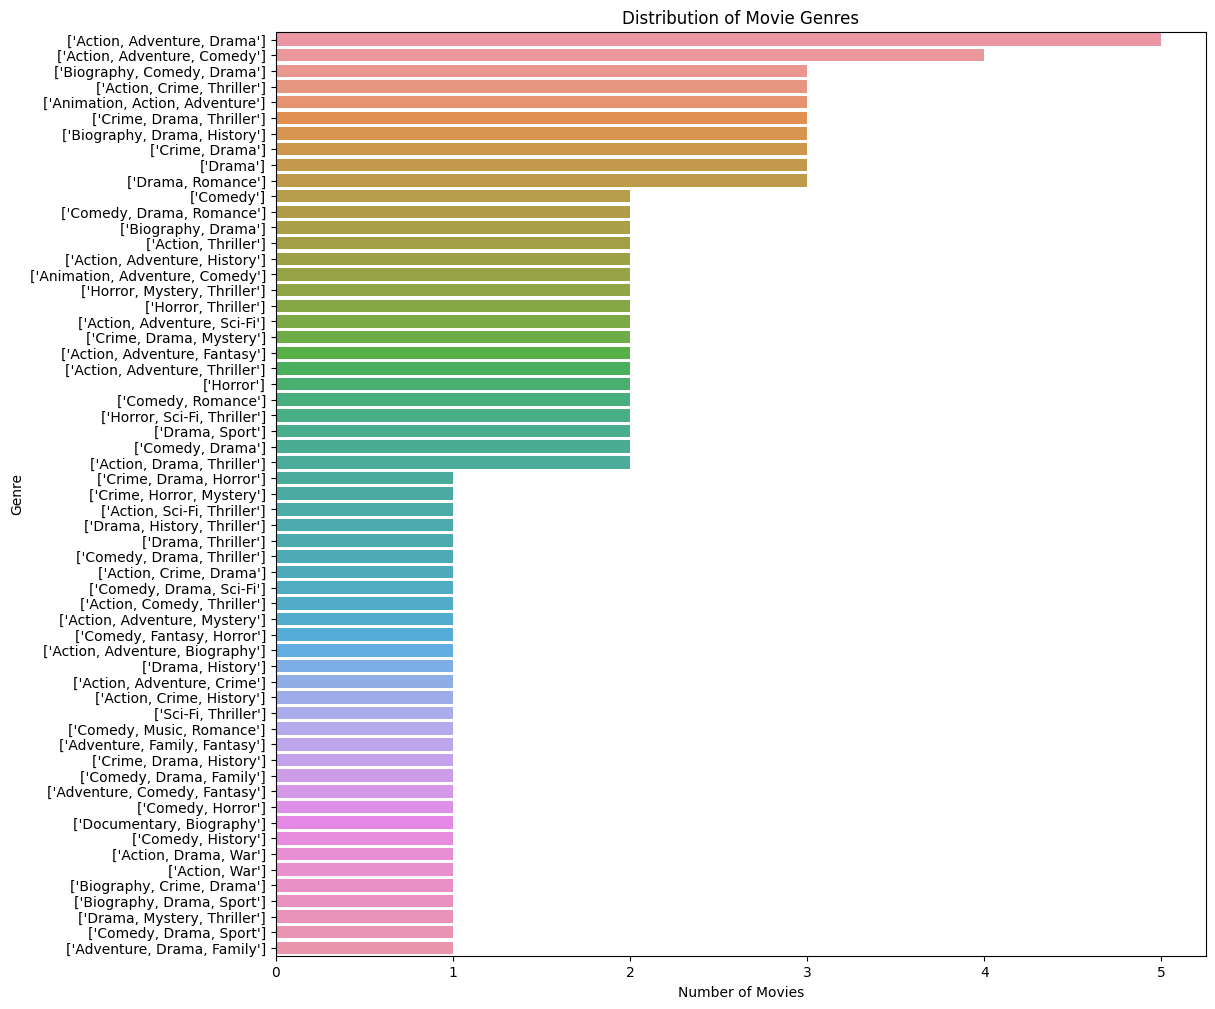

In [8]:
# Plot a bar chart of the most common genres
plt.figure(figsize=(12, 12))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


**How do the ratings vary across different genres?**

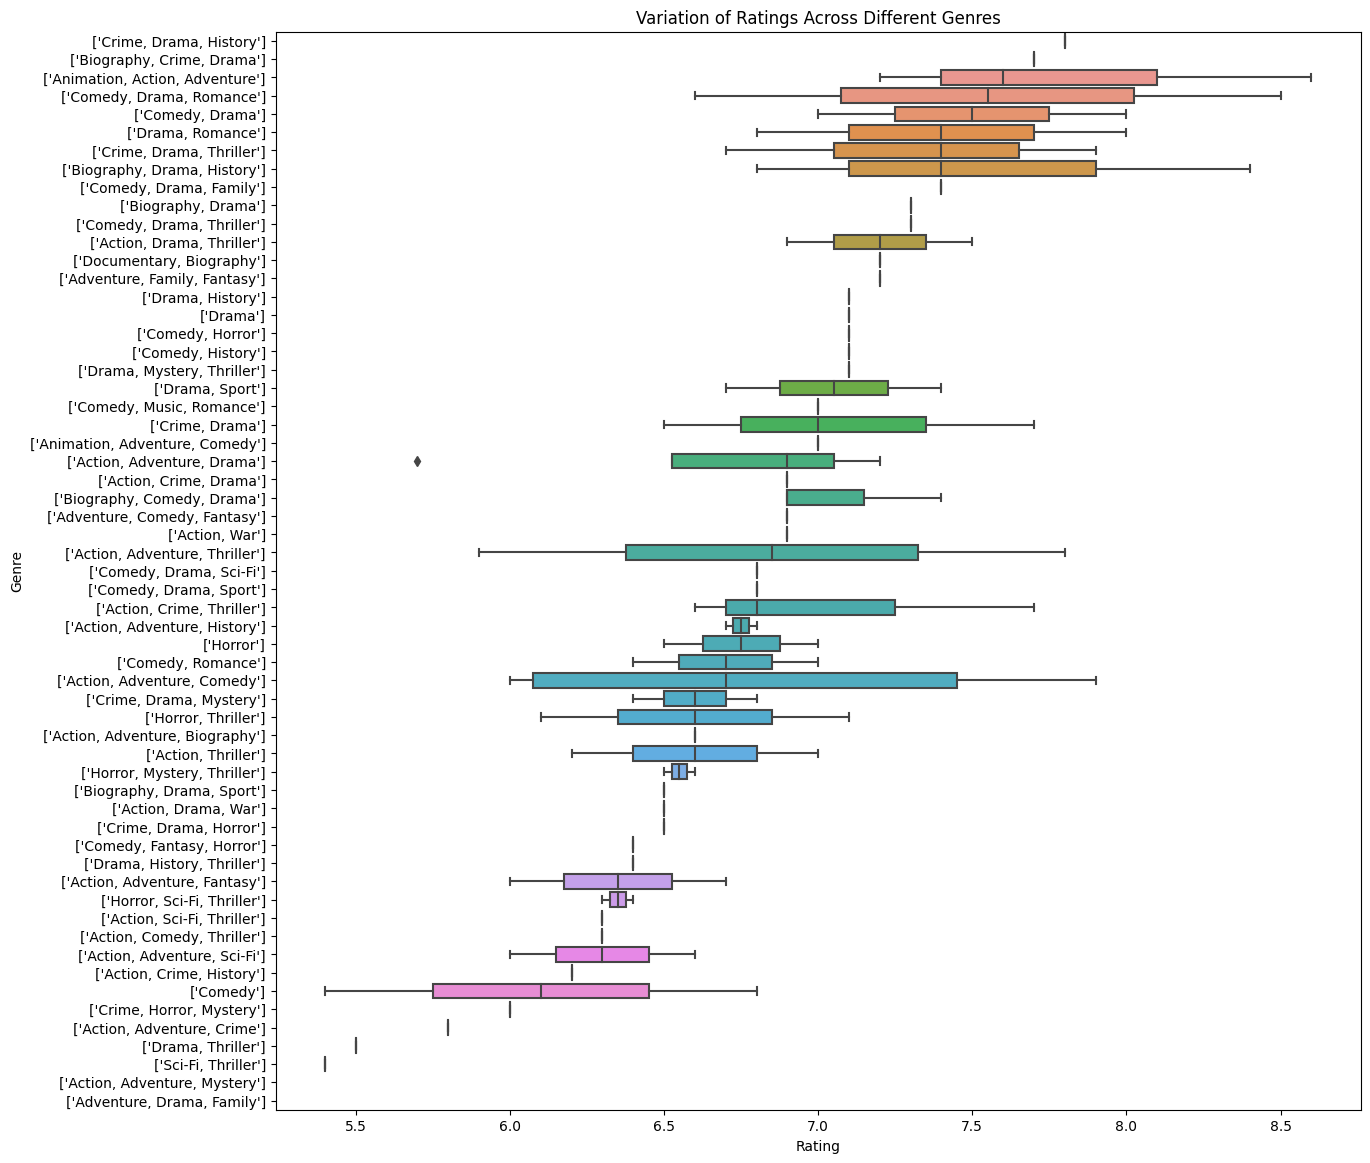

In [9]:
# Convert the 'rating' column to numeric, ignoring errors and converting 'none' to NaN
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Boxplot of ratings by genre
plt.figure(figsize=(14, 14))
sns.boxplot(x='rating', y='genre', data=df, order=df.groupby('genre')['rating'].median().sort_values(ascending=False).index)
plt.title('Variation of Ratings Across Different Genres')
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.show()


**What is the overall sentiment of movie descriptions?**

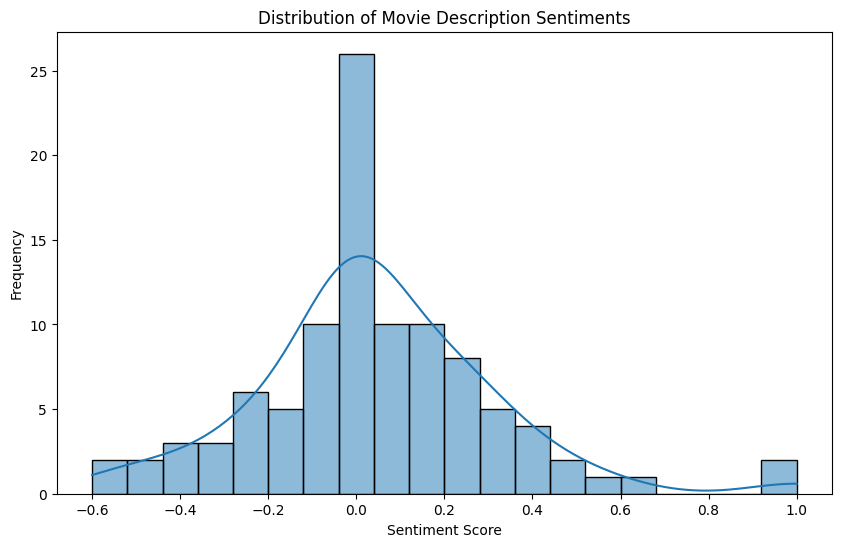

In [10]:
from textblob import TextBlob

# Add a new column for sentiment analysis
df['description_sentiment'] = df['description'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot a histogram of sentiment scores
plt.figure(figsize=(10, 6))
sns.histplot(df['description_sentiment'], bins=20, kde=True)
plt.title('Distribution of Movie Description Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


**Can we visualize the most common words in movie descriptions?**

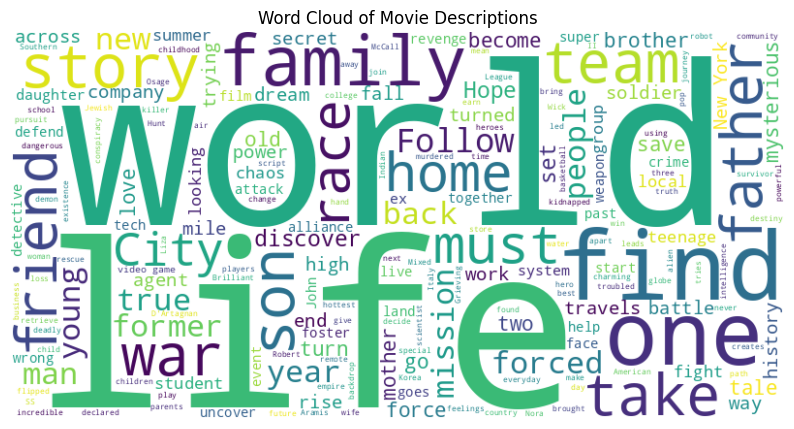

In [11]:
from wordcloud import WordCloud

# Generate a word cloud for movie descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['description']))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Descriptions')
plt.show()


**What is the distribution of movies based on their ratings?**

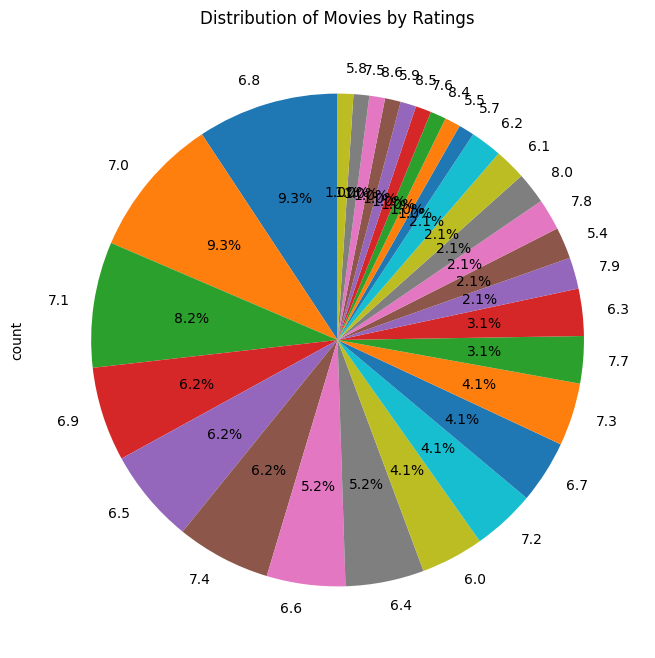

In [12]:
# Pie chart of the distribution of movies by ratings
plt.figure(figsize=(8, 8))
df['rating_rounded'] = df['rating'].round(1)  # Round ratings to one decimal place
df['rating_rounded'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies by Ratings')
plt.show()


**How are the ratings and runtime distributed for each genre?**

<Figure size 1600x1000 with 0 Axes>

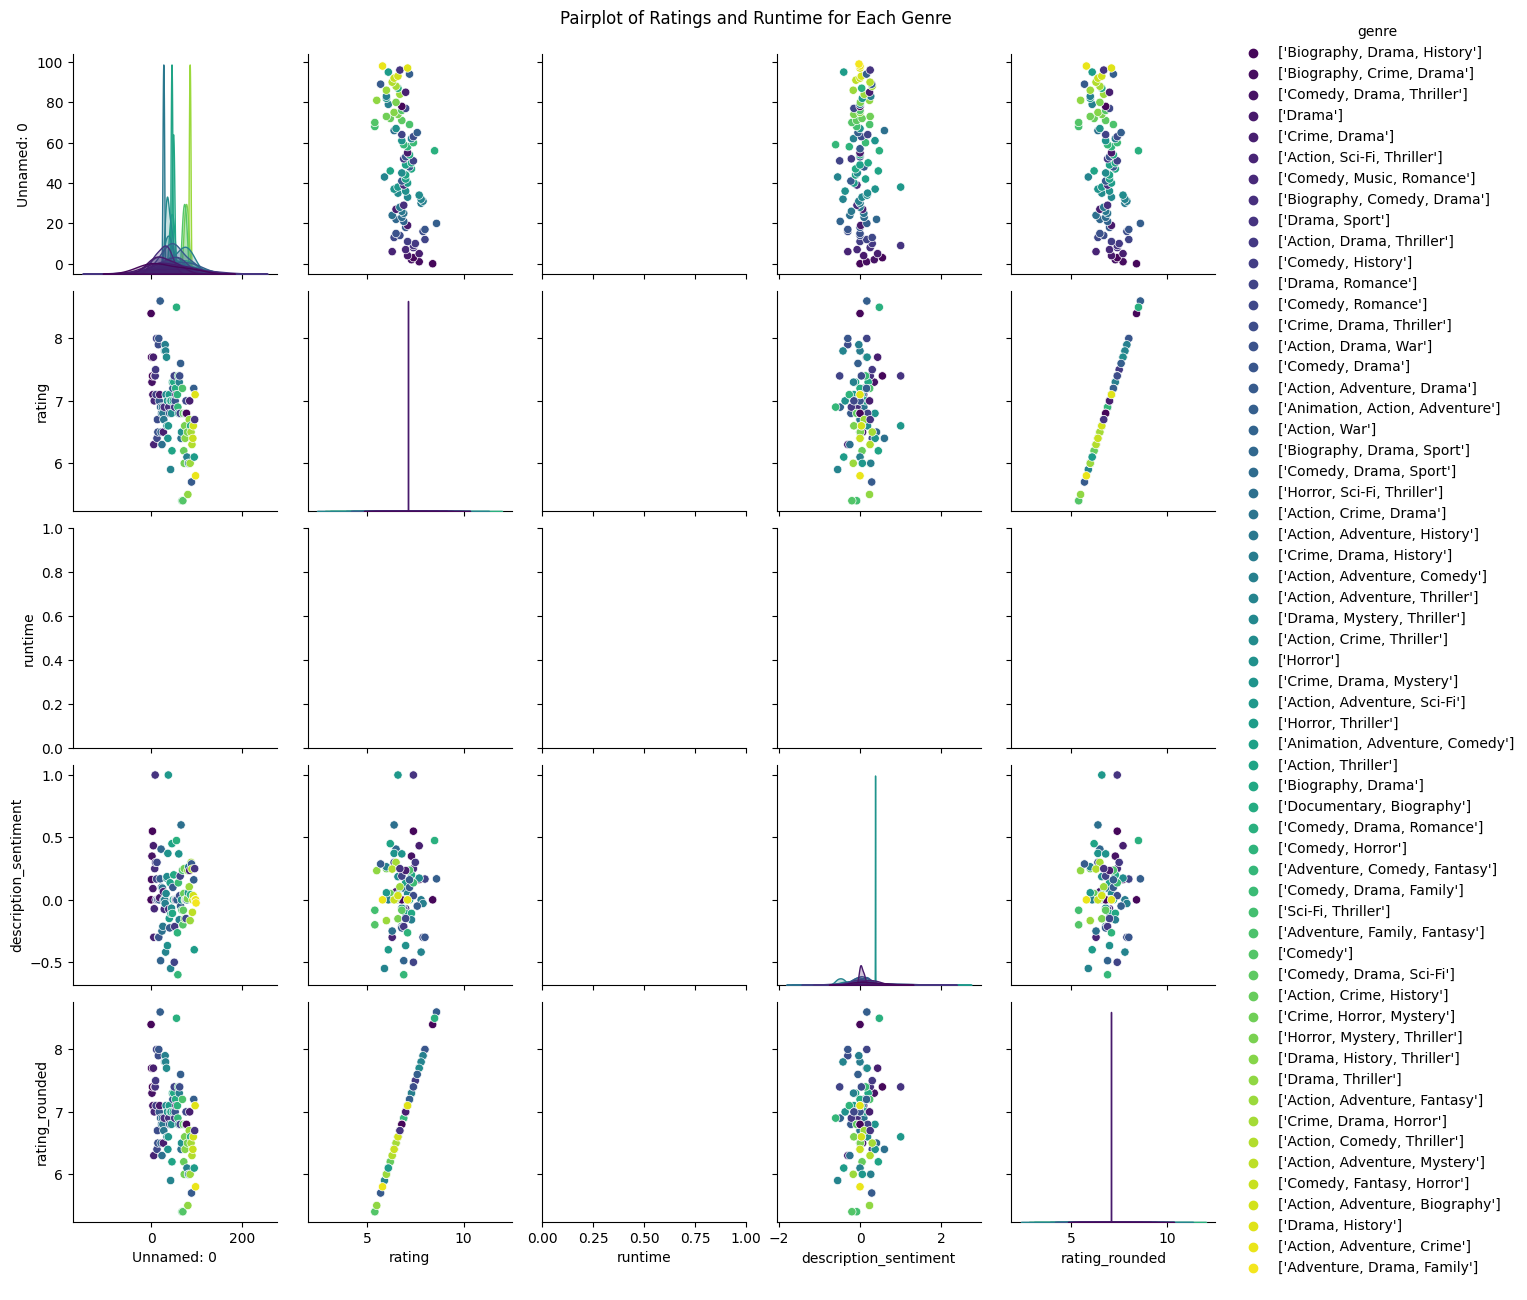

In [13]:
# Pairplot to visualize the joint distribution of ratings and runtime for each genre
plt.figure(figsize=(16, 10))
sns.pairplot(df, hue='genre', diag_kind='kde', markers='o', palette='viridis')
plt.suptitle('Pairplot of Ratings and Runtime for Each Genre', y=1.02)
plt.show()


**How does the number of votes relate to the genre of the movies?**

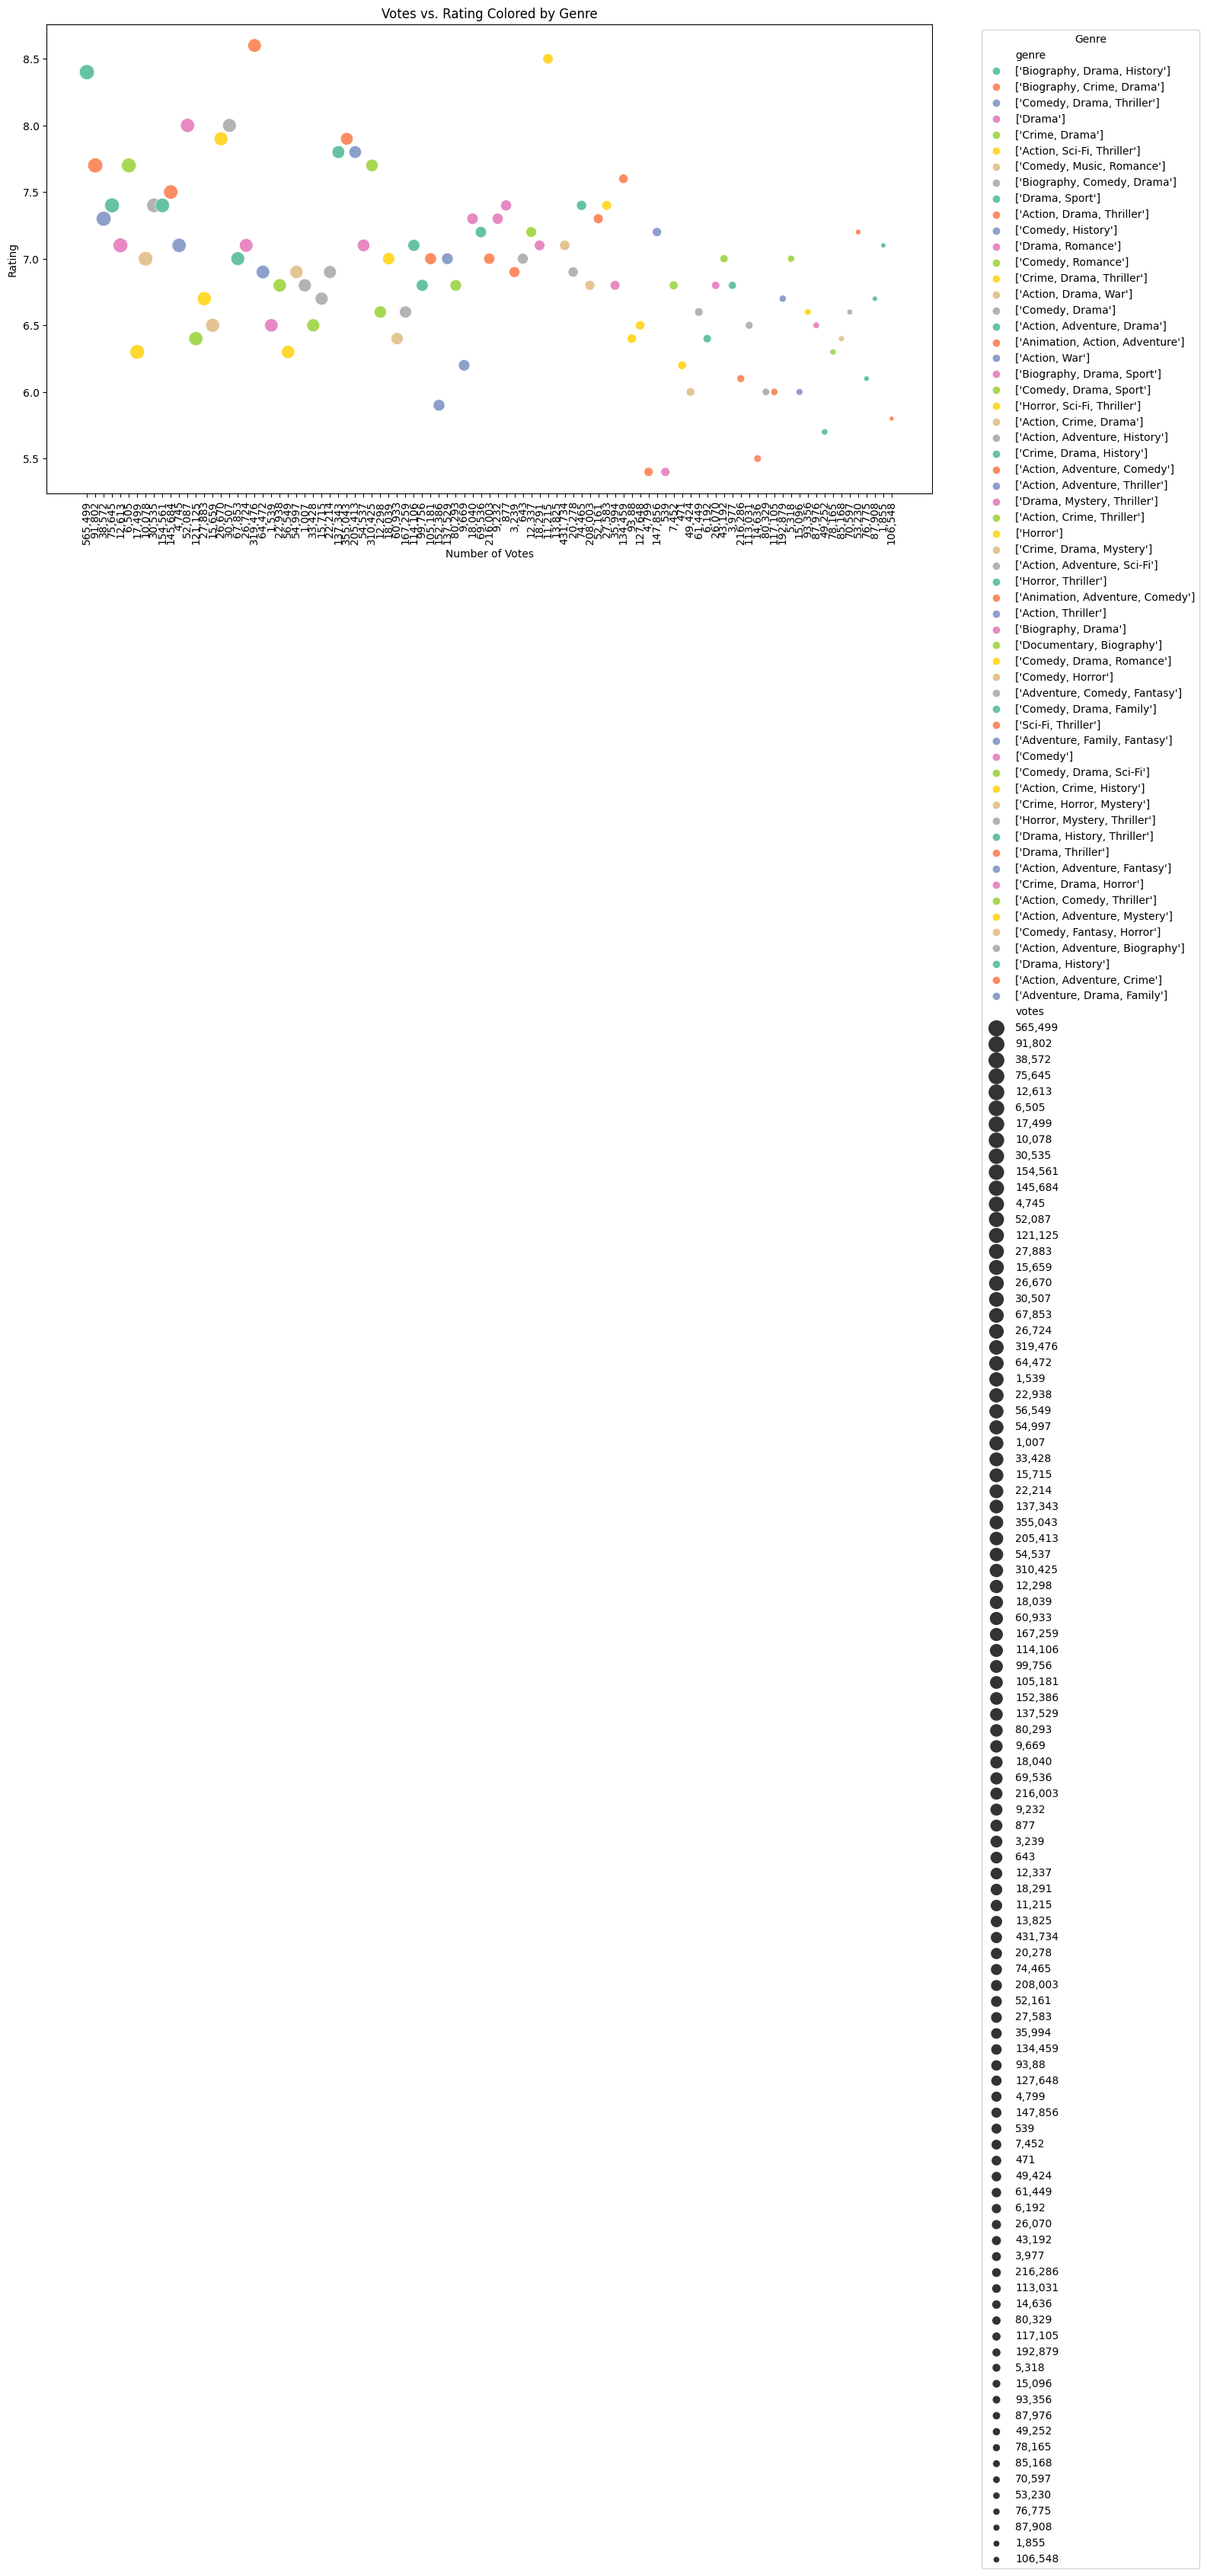

In [14]:
# Bubble plot of votes vs. rating, colored by genre
plt.figure(figsize=(15, 8))
sns.scatterplot(x='votes', y='rating', hue='genre', size='votes', data=df, sizes=(20, 200), palette='Set2')
plt.title('Votes vs. Rating Colored by Genre')
plt.xlabel('Number of Votes')
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**What is the average rating for each genre?**

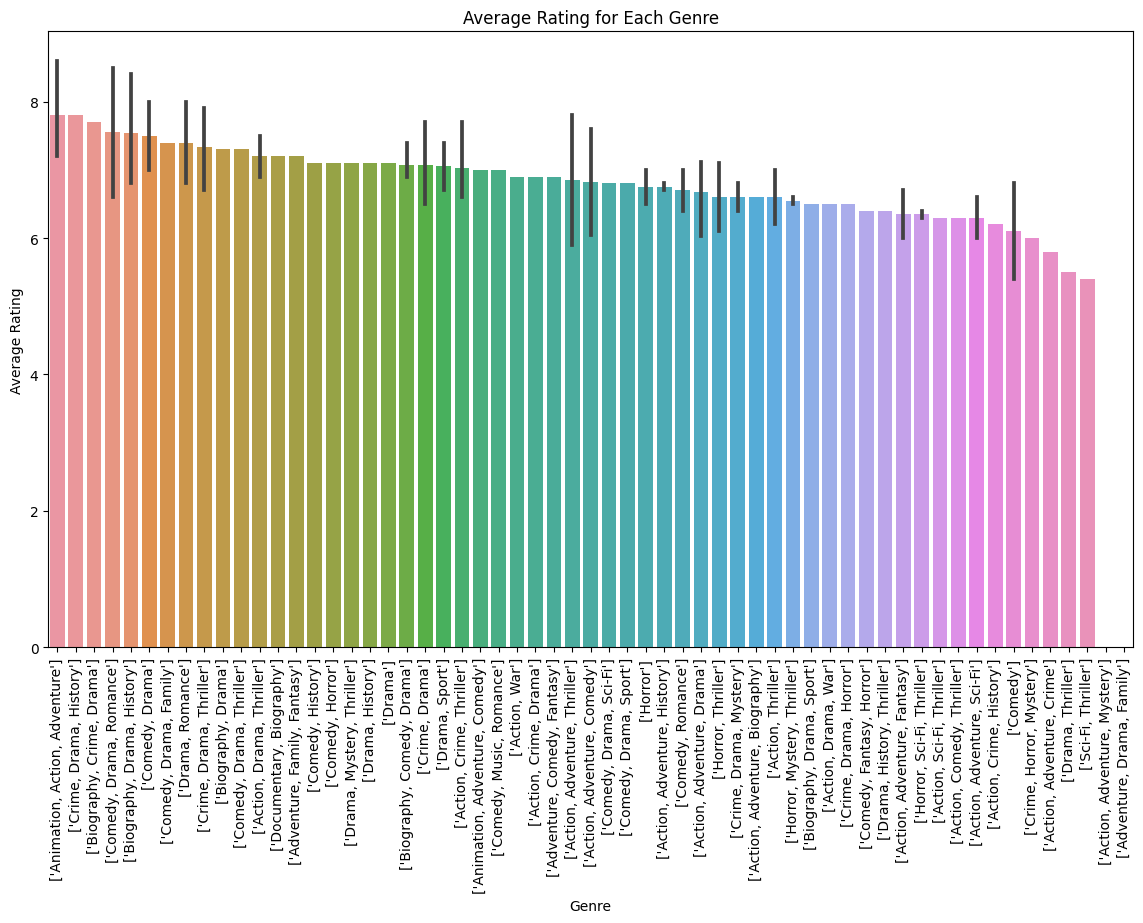

In [15]:
# Bar chart to show average rating for each genre
plt.figure(figsize=(14, 8))
sns.barplot(x='genre', y='rating', data=df, order=df.groupby('genre')['rating'].mean().sort_values(ascending=False).index)
plt.title('Average Rating for Each Genre')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.show()


**What is the correlation matrix between numerical features?**

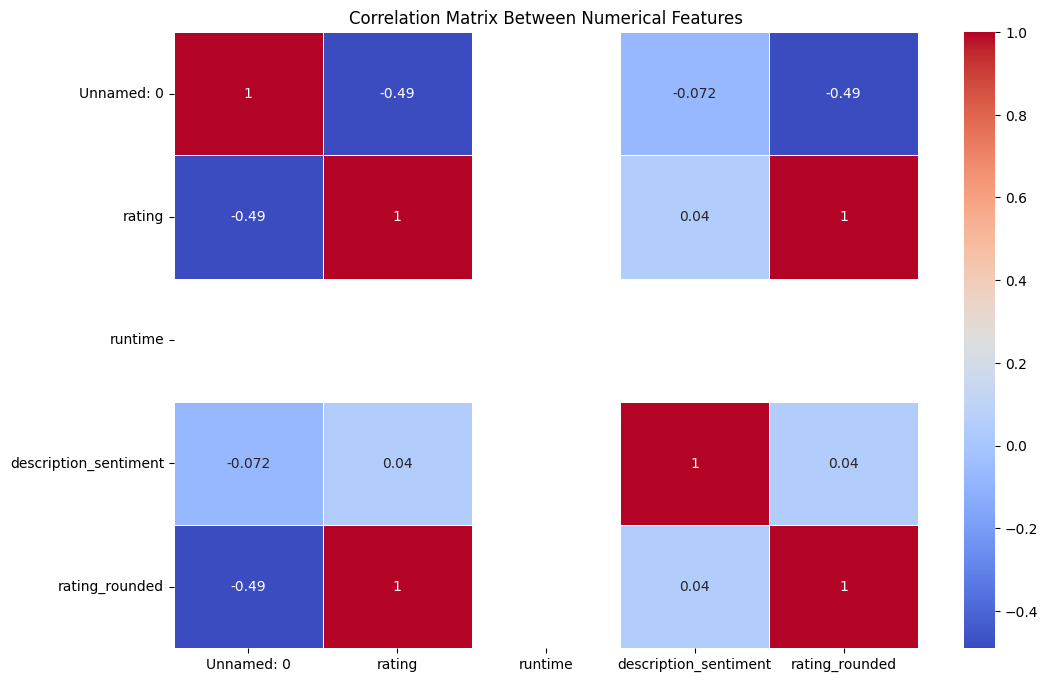

In [16]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Between Numerical Features')
plt.show()

**What is the distribution of ratings across different genres using a swarm plot?**

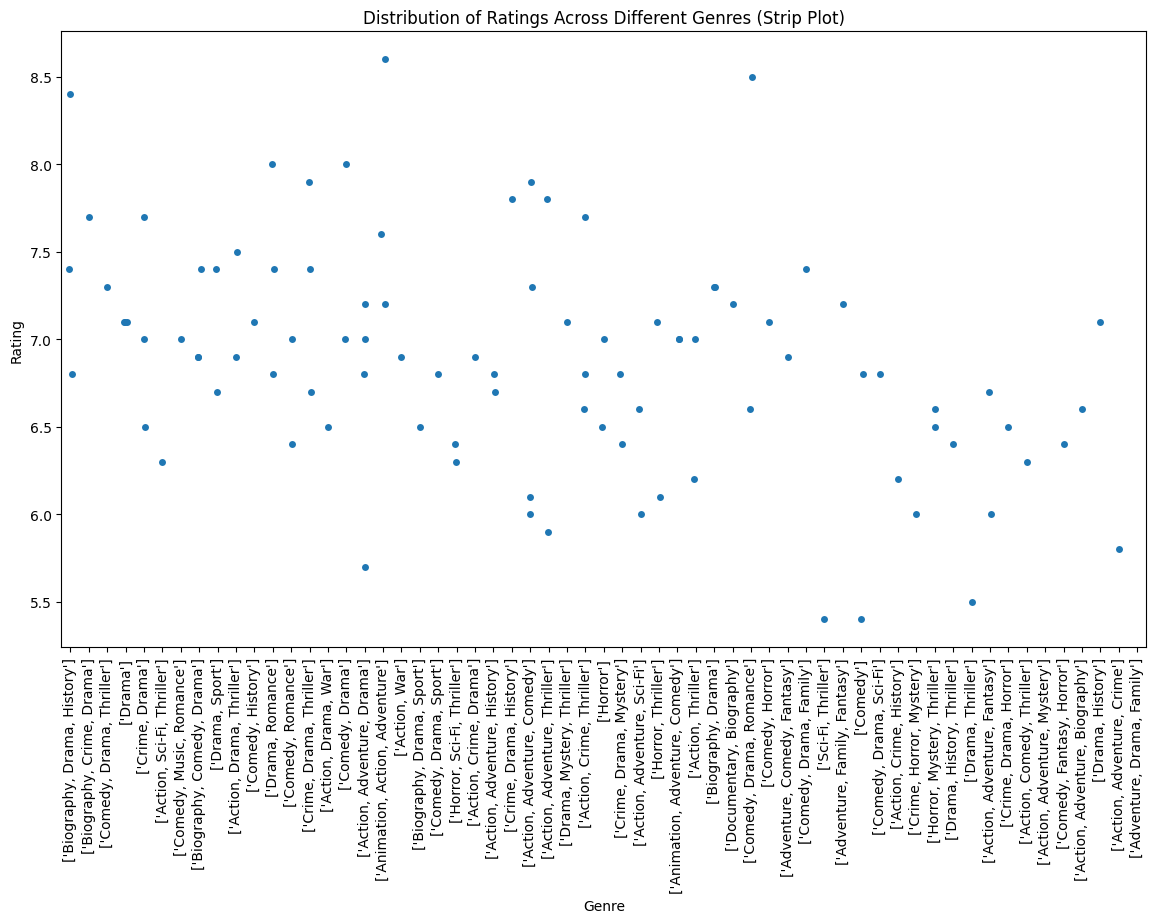

In [17]:
# Strip plot to show the distribution of ratings for each genre
plt.figure(figsize=(14, 8))
sns.stripplot(x='genre', y='rating', data=df, jitter=True, size=5)
plt.title('Distribution of Ratings Across Different Genres (Strip Plot)')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Rating')
plt.show()


**How does the average rating vary with the number of votes?**

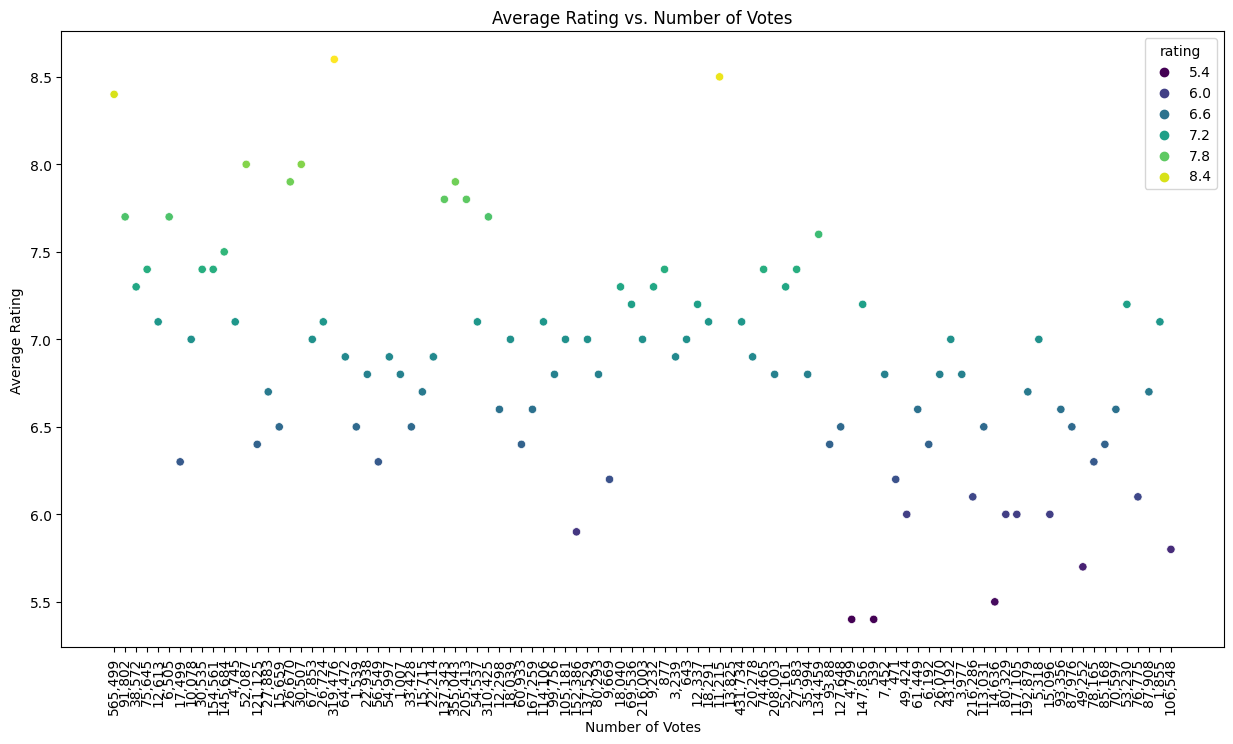

In [18]:
# Scatter plot with a color gradient to represent the average rating
plt.figure(figsize=(15, 8))
sns.scatterplot(x='votes', y='rating', hue='rating', data=df, palette='viridis')
plt.title('Average Rating vs. Number of Votes')
plt.xlabel('Number of Votes')
plt.xticks(rotation=90)
plt.ylabel('Average Rating')
plt.show()


**Can we visualize the distribution of ratings and runtimes using a 2D kernel density estimate?**

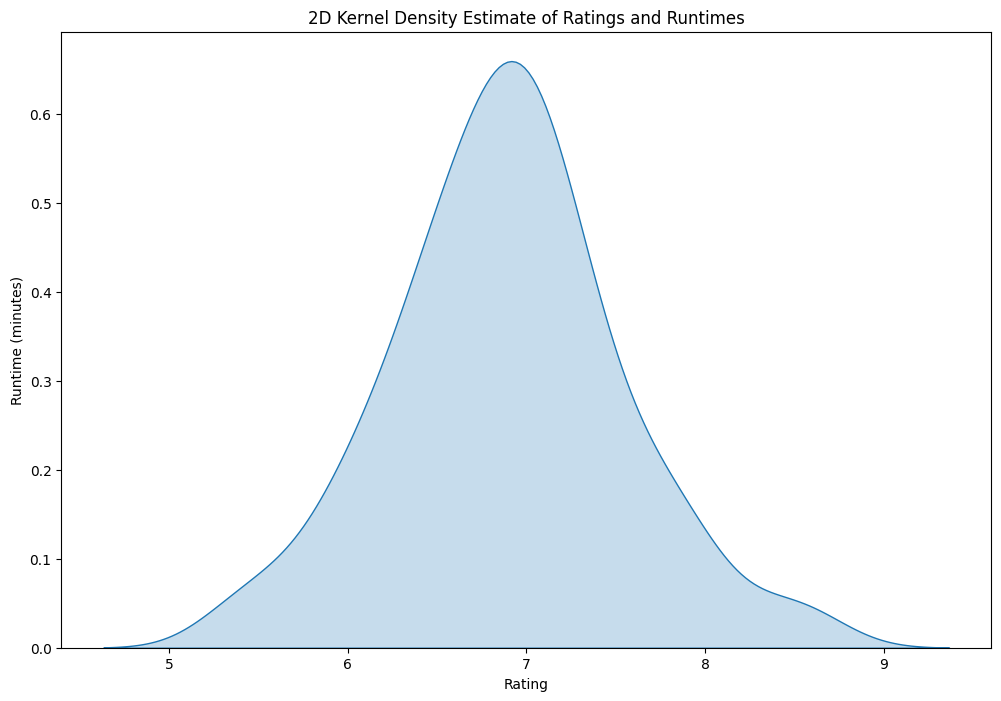

In [19]:
# 2D KDE plot to show the distribution of ratings and runtimes
plt.figure(figsize=(12, 8))
sns.kdeplot(x='rating', y='runtime', data=df, cmap='viridis', fill=True)
plt.title('2D Kernel Density Estimate of Ratings and Runtimes')
plt.xlabel('Rating')
plt.ylabel('Runtime (minutes)')
plt.show()


**Can we visualize the average rating and runtime for each genre using a grouped bar chart?**

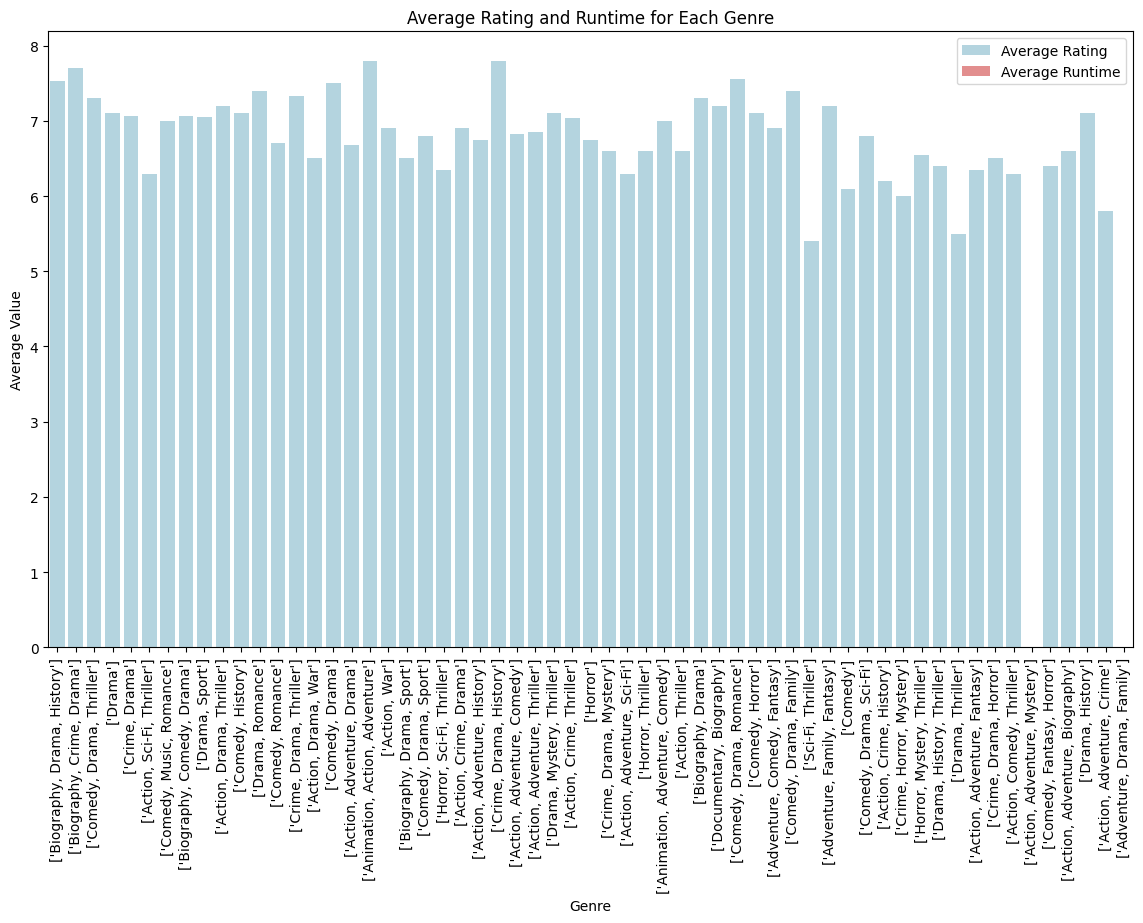

In [20]:
# Grouped bar chart to show average rating and runtime for each genre
plt.figure(figsize=(14, 8))
sns.barplot(x='genre', y='rating', data=df, estimator=np.mean, errorbar=None, color='lightblue', label='Average Rating')
sns.barplot(x='genre', y='runtime', data=df, estimator=np.mean, errorbar=None, color='lightcoral', label='Average Runtime')
plt.title('Average Rating and Runtime for Each Genre')
plt.xlabel('Genre')
plt.xticks(rotation=90)
plt.ylabel('Average Value')
plt.legend()
plt.show()


**How are ratings and runtimes related for different genres using a pair plot with a regression line?**

<Figure size 1600x1000 with 0 Axes>

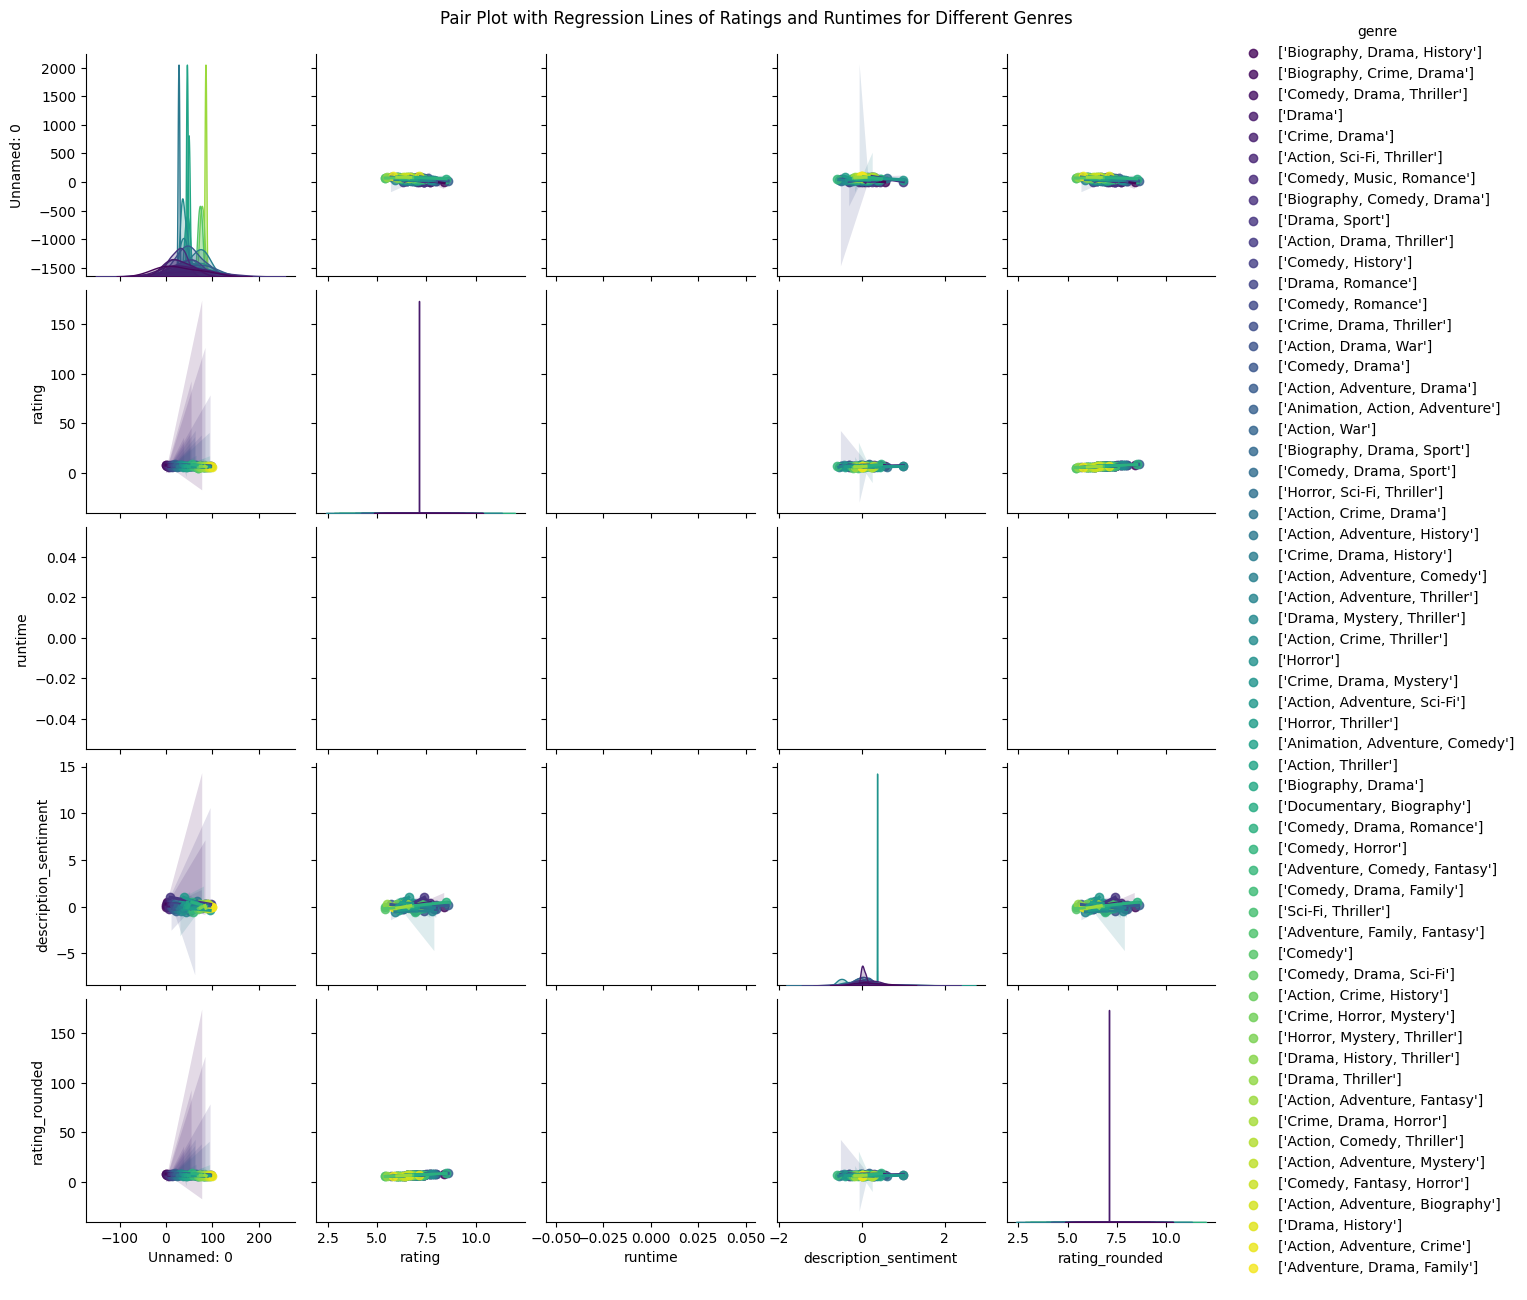

In [21]:
# Pair plot with regression lines to show the relationship between ratings and runtimes for each genre
plt.figure(figsize=(16, 10))
sns.pairplot(df, hue='genre', diag_kind='kde', markers='o', kind='reg', palette='viridis')
plt.suptitle('Pair Plot with Regression Lines of Ratings and Runtimes for Different Genres', y=1.02)
plt.show()
